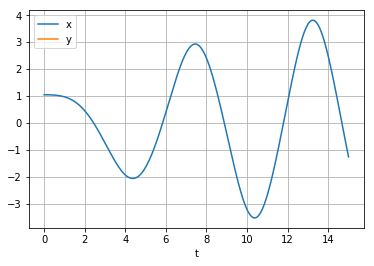

In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import ode



def fun(t, z, gamma, omega, delta, alfa, beta):
#  """
 # !  Right hand side of the differential equations
  #    dx/dt = -omega * y
   #   dy/dt = omega * x
    #"""
        x, y = z
        f = [y, gamma*math.cos(omega*t) - delta*y - alfa*x - beta*x**3]
        return f

wa = []
ga = []

for i in range(0,100):
# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dop853'.
    solver = ode(fun)
    solver.set_integrator('dopri5')


# Give the value of omega to the solver. This is passed to
# `fun` when the solver calls it.
gamma = 1
alfa = 1
omega = i*0.01
delta = 0.1
beta = 0.04
solver.set_f_params(gamma, omega, delta, alfa, beta)

# Set the initial value z(0) = z0.
t0 = 0.0
z0 = [1.05, 0.0]
solver.set_initial_value(z0, t0)

# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
t1 = 15
N = 2000
t = np.linspace(t0, t1, N)
sol = np.empty((N, 2))
sol[0] = z0


# Repeatedly call the `integrate` method to advance the
# solution to time t[k], and save the solution in sol[k].
k = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1
    x = sol[:,0]
   
    ga.append(max(abs(x)))
    wa.append(omega)
    
    
# Plot the solution...
plt.plot(t, sol[:,0], label='x')
plt.plot(wi1, zw1, label='y')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()